## 1. 라이브러리 불러오기

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

## 2. 데이터 전처리

### 1) 데이터셋 불러오기

In [15]:
dataset = datasets.fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
features, target = dataset
target = target.astype(int)

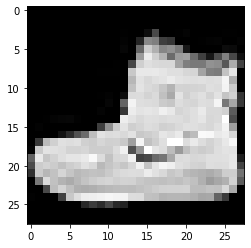

In [16]:
# 사진 시각화
image = features.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')

## 3. 모델 정의

In [26]:
# manifold의 TSNE 모델 정의
tsne = manifold.TSNE(n_components=2, random_state=42) # n_components : 투영 공간 지정

# 정규화 + 적용
tsne_tr = tsne.fit_transform(features[:30000]) # [30000, 2]

C:\Users\Bang\Anaconda\envs\BangEnv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Bang\Anaconda\envs\BangEnv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [41]:
# manifold의 TSNE 모델 정의
pca = PCA(n_components=2)

# 정규화 + 적용
pca_tr = pca.fit_transform(features[:30000])

## 2. 데이터 전처리 이어서

### 2) 데이터 프레임 생성

In [42]:
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'], data=np.column_stack((tsne_tr, target.iloc[:30000])))
cps_df.head()

,CP1,CP2,target
0,52.239960,24.541628,9.0
1,-16.266697,-60.695015,0.0
2,-28.576998,-14.118872,0.0
3,-26.859396,-19.420450,3.0
4,-45.595772,-29.311909,0.0


In [43]:
pca_df = pd.DataFrame(columns=['pca-1', 'pca-2', 'target'], data=np.column_stack((pca_tr, target.iloc[:30000])))
pca_df.head()

,pca-1,pca-2,target
0,-123.188592,1636.522039,9.0
1,1411.406686,-446.966992,0.0
2,-719.576344,-1103.779093,0.0
3,36.826718,-981.835302,3.0
4,812.544763,-1193.813429,0.0


### 3) 자료형 변환

In [44]:
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,52.239960,24.541628,9
1,-16.266697,-60.695015,0
2,-28.576998,-14.118872,0
3,-26.859396,-19.420450,3
4,-45.595772,-29.311909,0


In [45]:
pca_df.loc[:, 'target'] = pca_df.target.astype(int)
pca_df.head()

,pca-1,pca-2,target
0,-123.188592,1636.522039,9
1,1411.406686,-446.966992,0
2,-719.576344,-1103.779093,0
3,36.826718,-981.835302,3
4,812.544763,-1193.813429,0


### 4) 문자열 임베딩

In [46]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}

In [47]:
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)
cps_df.head()

,CP1,CP2,target
0,52.239960,24.541628,Ankle Boot
1,-16.266697,-60.695015,T-shirt/top
2,-28.576998,-14.118872,T-shirt/top
3,-26.859396,-19.420450,Dress
4,-45.595772,-29.311909,T-shirt/top


In [48]:
pca_df.loc[:, 'target'] = pca_df.target.map(clothes_map)
pca_df.head()

,pca-1,pca-2,target
0,-123.188592,1636.522039,Ankle Boot
1,1411.406686,-446.966992,T-shirt/top
2,-719.576344,-1103.779093,T-shirt/top
3,36.826718,-981.835302,Dress
4,812.544763,-1193.813429,T-shirt/top


<AxesSubplot:>

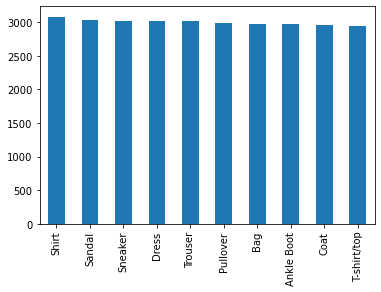

In [49]:
# 차원축소 개수 시각화
cps_df.target.value_counts().plot(kind='bar')

<AxesSubplot:>

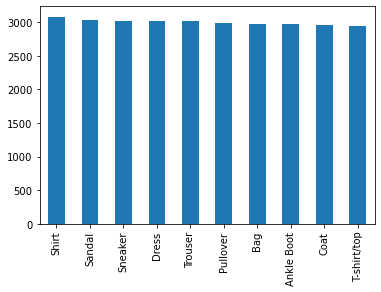

In [50]:
pca_df.target.value_counts().plot(kind='bar')

C:\Users\Bang\Anaconda\envs\BangEnv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


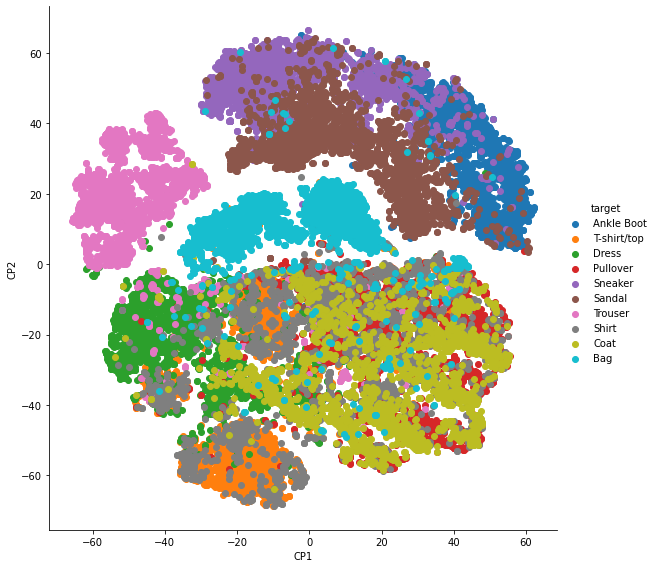

In [51]:
# 차원축소 결과 시각화
grid = sns.FacetGrid(cps_df, hue="target", size=8)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

C:\Users\Bang\Anaconda\envs\BangEnv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


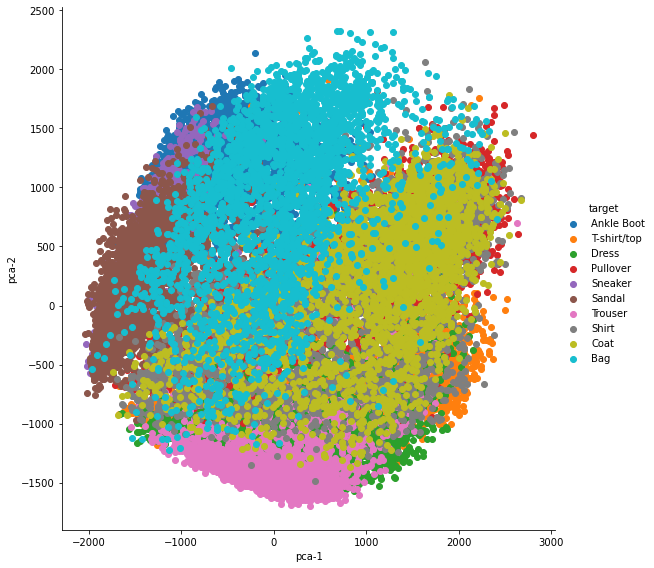

In [52]:
# 차원축소 결과 시각화
grid = sns.FacetGrid(pca_df, hue="target", size=8)
grid.map(plt.scatter, 'pca-1', 'pca-2').add_legend()